In [2]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

# Set the current working directory to the root of the repository
os.chdir("C:/Users/Alex H/OneDrive/Documents/BU Fall 2023/DS701/ds-livable-streets-infra/")

# Customize data folder
data_folder = "fa23-team/data/"

# Read demographic and property value data
data = pd.read_csv(data_folder + "census_bike_merged.csv", index_col=False)
print("Data shape: ", data.shape)

Data shape:  (736, 40)


In [3]:
jp = data[data['neighborhood'] == "Jamaica Plain"]
jp

,tract,year,neighborhood,total_population,male,female,median_age,race_white,race_black,race_ai_alaskan,...,BFBL,BL,BLSL,SBL,SBLBL,SLM,SLMTC,SUP,total_built_all_lanes,cumulative_length
108,1101.03,2010,Jamaica Plain,5742.0,0.440,0.560,30.7,0.454,0.159,0.080,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
109,1101.03,2011,Jamaica Plain,5867.0,0.479,0.521,30.6,0.419,0.195,0.040,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
110,1101.03,2012,Jamaica Plain,5896.0,0.457,0.543,30.7,0.507,0.230,0.048,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
111,1101.03,2013,Jamaica Plain,5857.0,0.453,0.547,32.0,0.498,0.191,0.044,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
112,1101.03,2014,Jamaica Plain,6227.0,0.429,0.571,32.0,0.519,0.225,0.026,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
113,1101.03,2015,Jamaica Plain,6557.0,0.463,0.537,32.3,0.517,0.252,0.000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
114,1101.03,2016,Jamaica Plain,6547.0,0.451,0.549,33.2,0.560,0.230,0.000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
115,1101.03,2017,Jamaica Plain,6303.0,0.410,0.590,34.0,0.566,0.242,0.000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
116,1101.03,2018,Jamaica Plain,6667.0,0.431,0.569,35.1,0.589,0.273,0.000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
117,1101.03,2019,Jamaica Plain,6812.0,0.460,0.540,35.4,0.554,0.320,0.000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
dor = data[data['neighborhood'] == "Dorchester"]
rox = data[data['neighborhood'] == "Roxbury"]

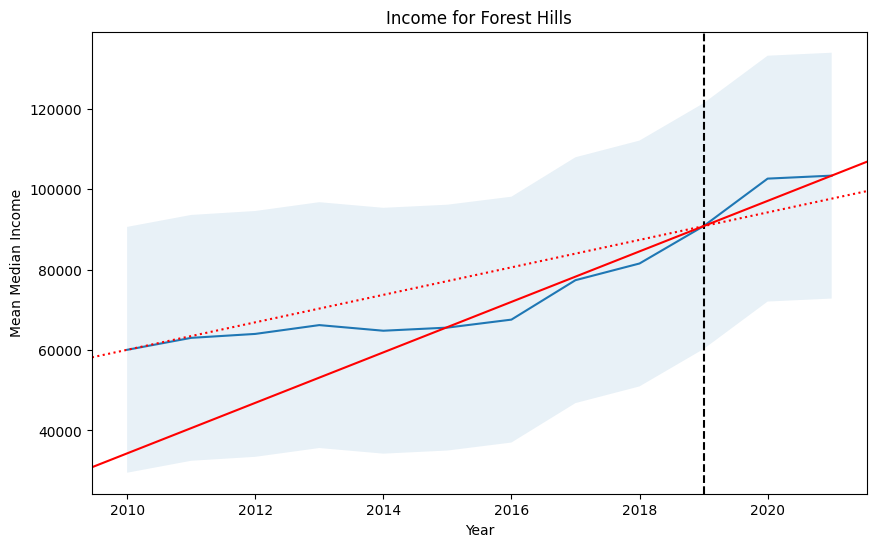

In [5]:
# # Find mean 'median_income' pre- and post-Casey Arborway
# pre_casey = data[data['year'] < 2019]
# post_casey = data[data['year'] >= 2019]
# print(len(pre_casey), len(post_casey))

# pre_inc = pre_casey.groupby('year').mean('median_income').median_income
# post_inc = post_casey.groupby('year').mean('median_income').median_income

# Plot mean median income of Forest Hills
X = jp['year'].unique()
y = jp.groupby('year').mean('median_income').median_income
slope1 = (float(y[[2019]]) - float(y[[2010]])) / 9
slope2 = (float(y[[2021]]) - float(y[[2019]])) / 2

plt.figure(figsize=(10,6))
plt.plot(X, y)

# Add confidence intervals
plt.fill_between(X, 
                 y - 1.96*y.std(), 
                 y + 1.96*y.std(), 
                 alpha=0.1)

# Add line at 2019
plt.axvline(x=2019, color='black', linestyle='--')

# Add slope from 2010-2019 data
plt.axline((2010, float(y[[2010]])), slope=slope1, color='r', linestyle=':')
plt.axline((2019, float(y[[2019]])), slope=slope2, color='r', linestyle='-')

plt.title('Income for Forest Hills')
plt.xlabel('Year')
plt.ylabel('Mean Median Income')
plt.show()

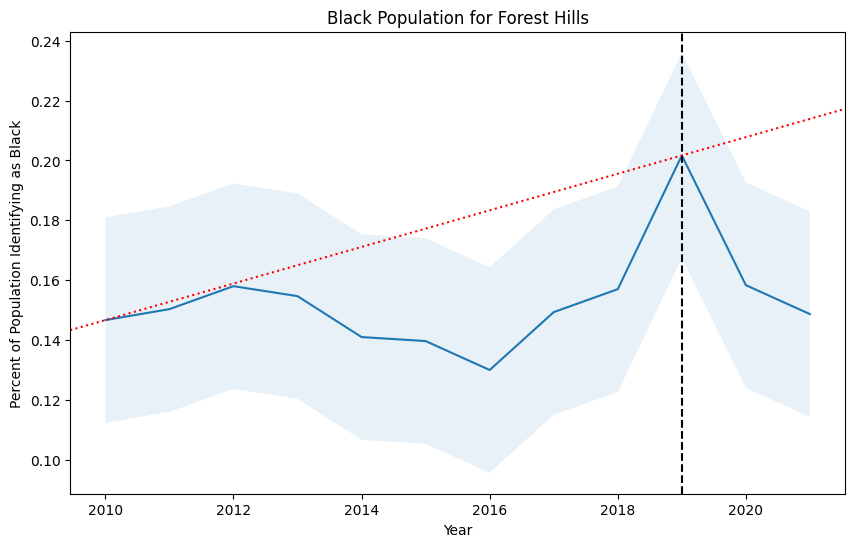

In [6]:
# Plot mean race_black of Forest Hills
X = jp['year'].unique()
y = jp.groupby('year').mean('race_black').race_black
slope = (float(y[[2019]]) - float(y[[2010]])) / 9

plt.figure(figsize=(10,6))
plt.plot(X, y)

# Add confidence intervals
plt.fill_between(X, 
                 y - 1.96*y.std(), 
                 y + 1.96*y.std(), 
                 alpha=0.1)

# Add line at 2019
plt.axvline(x=2019, color='black', linestyle='--')

# Add slope from 2010-2019 data
plt.axline((2010, float(y[[2010]])), slope=slope, color='r', linestyle=':')

plt.title('Black Population for Forest Hills')
plt.xlabel('Year')
plt.ylabel('Percent of Population Identifying as Black')
plt.show()

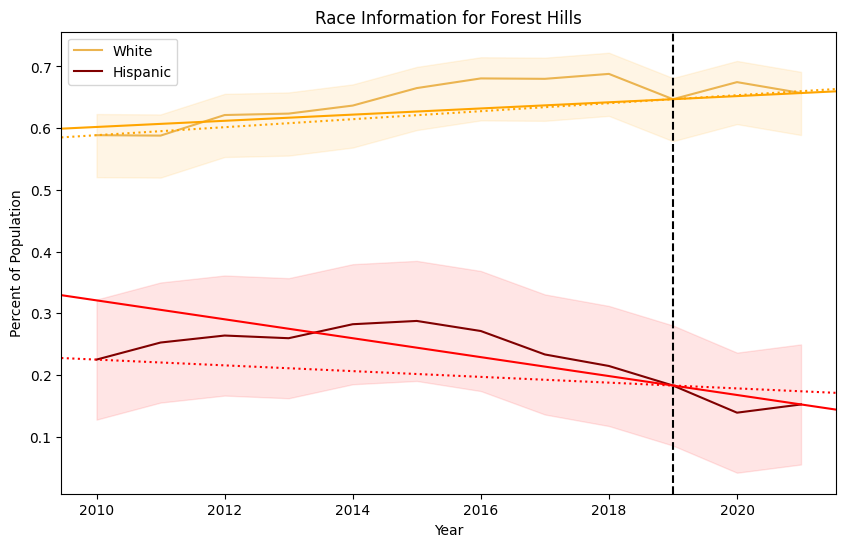

In [7]:
# Combine graphs for race in Forest Hills
X = jp['year'].unique()
# jp.groupby('year').mean('race_hispanic').race_hispanic

plt.figure(figsize=(10,6))

# # Black
# plt.plot(X, jp.groupby('year').mean('race_black').race_black, label="Black")
# plt.fill_between(X, 
#                  jp.groupby('year').mean('race_black').race_black - 1.96*jp.groupby('year').mean('race_black').race_black.std(), 
#                  jp.groupby('year').mean('race_black').race_black + 1.96*jp.groupby('year').mean('race_black').race_black.std(), 
#                  alpha=0.1)
# plt.axline((2010, jp.groupby('year').mean('race_black').race_black[2010]), 
#            slope= (jp.groupby('year').mean('race_black').race_black[2019] - jp.groupby('year').mean('race_black').race_black[2010])/9, 
#            color='blue', 
#            linestyle=':')
# plt.axline((2019, jp.groupby('year').mean('race_black').race_black[2019]), 
#            slope= (jp.groupby('year').mean('race_black').race_black[2021] - jp.groupby('year').mean('race_black').race_black[2019])/2, 
#            color='blue', 
#            linestyle='-')

# White
plt.plot(X, jp.groupby('year').mean('race_white').race_white, label="White", c='#ebb450')
plt.fill_between(X, 
                 jp.groupby('year').mean('race_white').race_white - 1.96*jp.groupby('year').mean('race_white').race_white.std(), 
                 jp.groupby('year').mean('race_white').race_white + 1.96*jp.groupby('year').mean('race_white').race_black.std(), 
                 alpha=0.1,
                 color='orange')
plt.axline((2010, jp.groupby('year').mean('race_white').race_white[2010]), 
           slope= (jp.groupby('year').mean('race_white').race_white[2019] - jp.groupby('year').mean('race_white').race_white[2010])/9, 
           color='orange', 
           linestyle=':')
plt.axline((2019, jp.groupby('year').mean('race_white').race_white[2019]), 
           slope= (jp.groupby('year').mean('race_white').race_white[2021] - jp.groupby('year').mean('race_white').race_white[2019])/2, 
           color='orange', 
           linestyle='-')

# # Asian
# plt.plot(X, jp.groupby('year').mean('race_asian').race_asian, label="Asian", c="#5ba84d")
# plt.fill_between(X, 
#                  jp.groupby('year').mean('race_asian').race_asian - 1.96*jp.groupby('year').mean('race_asian').race_asian.std(), 
#                  jp.groupby('year').mean('race_asian').race_asian + 1.96*jp.groupby('year').mean('race_asian').race_asian.std(), 
#                  alpha=0.1)
# plt.axline((2010, jp.groupby('year').mean('race_asian').race_asian[2010]), 
#            slope= (jp.groupby('year').mean('race_asian').race_asian[2019] - jp.groupby('year').mean('race_asian').race_asian[2010])/9, 
#            color='green', 
#            linestyle=':')
# plt.axline((2019, jp.groupby('year').mean('race_asian').race_asian[2019]), 
#            slope= (jp.groupby('year').mean('race_asian').race_asian[2021] - jp.groupby('year').mean('race_asian').race_asian[2019])/2, 
#            color='green', 
#            linestyle='-')

# Hispanic
plt.plot(X, jp.groupby('year').mean('race_hispanic').race_hispanic, label="Hispanic", c='maroon')
plt.fill_between(X, 
                 jp.groupby('year').mean('race_hispanic').race_hispanic - 1.96*jp.groupby('year').mean('race_hispanic').race_hispanic.std(), 
                 jp.groupby('year').mean('race_hispanic').race_hispanic + 1.96*jp.groupby('year').mean('race_hispanic').race_hispanic.std(), 
                 alpha=0.1,
                 color='red')
plt.axline((2010, jp.groupby('year').mean('race_hispanic').race_hispanic[2010]), 
           slope= (jp.groupby('year').mean('race_hispanic').race_hispanic[2019] - jp.groupby('year').mean('race_hispanic').race_hispanic[2010])/9, 
           color='red', 
           linestyle=':')
plt.axline((2019, jp.groupby('year').mean('race_hispanic').race_hispanic[2019]), 
           slope= (jp.groupby('year').mean('race_hispanic').race_hispanic[2021] - jp.groupby('year').mean('race_hispanic').race_hispanic[2019])/2, 
           color='red', 
           linestyle='-')

# Add line at 2019
plt.axvline(x=2019, color='black', linestyle='--')

plt.legend()
plt.title('Race Information for Forest Hills')
plt.xlabel('Year')
plt.ylabel('Percent of Population')
plt.show()

# Add axline after 2019 (dotted), and before 2019 as solid

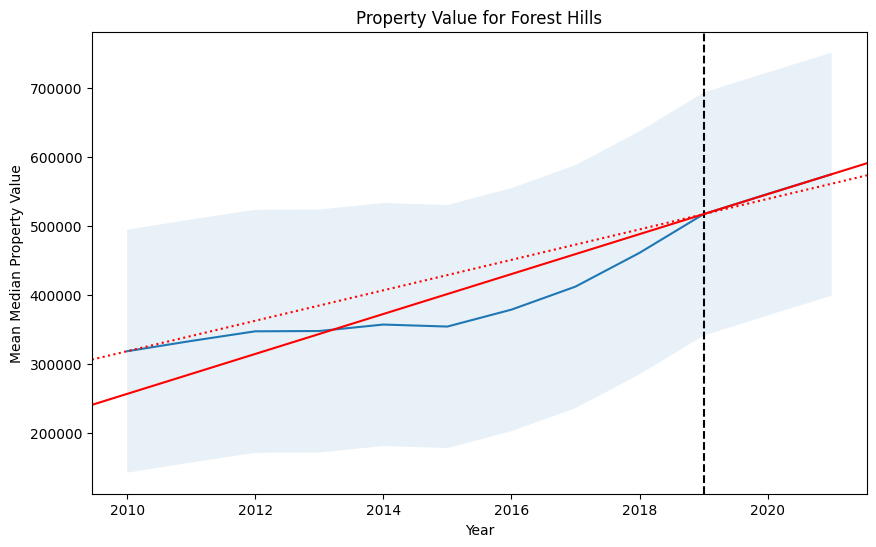

In [8]:
# Plot mean property_value of Forest Hills
X = jp['year'].unique()
y = jp.groupby('year').mean('median_value').median_value
slope1 = (float(y[[2019]]) - float(y[[2010]])) / 9
slope2 = (float(y[[2021]]) - float(y[[2019]])) / 2

plt.figure(figsize=(10,6))
plt.plot(X, y)

# Add confidence intervals
plt.fill_between(X, 
                 y - 1.96*y.std(), 
                 y + 1.96*y.std(), 
                 alpha=0.1)

# Add line at 2019
plt.axvline(x=2019, color='black', linestyle='--')

# Add slope from 2010-2019 data
plt.axline((2010, float(y[[2010]])), slope=slope1, color='r', linestyle=':')

# Add slope from 2019-2021 data
plt.axline((2019, float(y[[2019]])), slope=slope2, color='r', linestyle='-')

plt.title('Property Value for Forest Hills')
plt.xlabel('Year')
plt.ylabel('Mean Median Property Value')
plt.show()

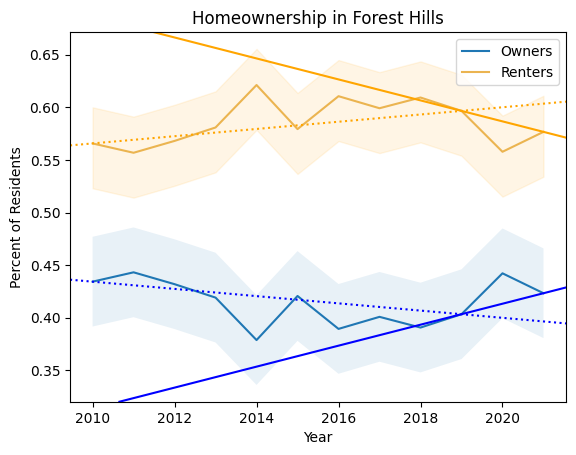

In [9]:
# Plot mean home ownership of Forest Hills
X = jp['year'].unique()

# Owners
plt.plot(X, jp.groupby('year').mean('percent_owners').percent_owners, label="Owners")
plt.fill_between(X, 
                 jp.groupby('year').mean('percent_owners').percent_owners - 1.96*jp.groupby('year').mean('percent_owners').percent_owners.std(), 
                 jp.groupby('year').mean('percent_owners').percent_owners + 1.96*jp.groupby('year').mean('percent_owners').percent_owners.std(), 
                 alpha=0.1)
plt.axline((2010, jp.groupby('year').mean('percent_owners').percent_owners[2010]), 
           slope= (jp.groupby('year').mean('percent_owners').percent_owners[2019] - jp.groupby('year').mean('percent_owners').percent_owners[2010])/9, 
           color='blue', 
           linestyle=':')
plt.axline((2019, jp.groupby('year').mean('percent_owners').percent_owners[2019]), 
           slope= (jp.groupby('year').mean('percent_owners').percent_owners[2021] - jp.groupby('year').mean('percent_owners').percent_owners[2019])/2, 
           color='blue', 
           linestyle='-')

# Renters
plt.plot(X, jp.groupby('year').mean('percent_renters').percent_renters, label="Renters", c='#ebb450')
plt.fill_between(X, 
                 jp.groupby('year').mean('percent_renters').percent_renters - 1.96*jp.groupby('year').mean('percent_renters').percent_renters.std(), 
                 jp.groupby('year').mean('percent_renters').percent_renters + 1.96*jp.groupby('year').mean('percent_renters').race_black.std(), 
                 alpha=0.1,
                 color='orange')
plt.axline((2010, jp.groupby('year').mean('percent_renters').percent_renters[2010]), 
           slope= (jp.groupby('year').mean('percent_renters').percent_renters[2019] - jp.groupby('year').mean('percent_renters').percent_renters[2010])/9, 
           color='orange', 
           linestyle=':')
plt.axline((2019, jp.groupby('year').mean('percent_renters').percent_renters[2019]), 
           slope= (jp.groupby('year').mean('percent_renters').percent_renters[2021] - jp.groupby('year').mean('percent_renters').percent_renters[2019])/2, 
           color='orange', 
           linestyle='-')

plt.title('Homeownership in Forest Hills')
plt.legend()
plt.xlabel('Year')
plt.ylabel('Percent of Residents')
plt.show()

# Regression Analysis

In [11]:
reg_jp = jp.copy(deep=True)

treat_years = [2020, 2021]

# create a treatment column 
reg_jp['treatment'] = np.where(reg_jp['year'].isin(treat_years), 1, 0)

n_control = len(reg_jp.loc[reg_jp['treatment']==0]['tract'])
n_treatment = len(reg_jp.loc[reg_jp['treatment']==1]['tract'])

print(n_control)
print(n_treatment)

30
6


In [20]:
# Run the DiD model
pd.options.display.float_format = '{:.2f}'.format
import statsmodels.formula.api as smf

#filter reg_jp for only 2 years before and after treatment
reg_limit = reg_jp[(reg_jp['year']>=2018)&(reg_jp['year']<=2021)]
targets = ['median_income', 'median_value', 'median_monthly_rent', 'race_white']
for var in targets:
    model = smf.ols(f'{var} ~ treatment*post_treatment*year + C(tract) ', data=reg_limit).fit()
    table = pd.DataFrame(model.summary2().tables[1])

    # Show full numbers instead of scientific notation
    print(var)
    print(f'N = {len(reg_limit)}')
    print(f'R2 = {model.rsquared:.2f}')
    print(table.iloc[-7:, :3])
    coeff = model.params['treatment']
    pval = model.pvalues['treatment']
    print(f'Treatment variable has a coefficient of {coeff: .2f} and a p-value of {pval: .2f}')

median_income
N = 12
R2 = 0.95
                                   Coef.   Std.Err.     t
treatment                     5760311.78 3071824.52  1.88
post_treatment                5760311.78 3071824.52  1.88
treatment:post_treatment      5760311.78 3071824.52  1.88
year                             9296.33    3226.70  2.88
treatment:year                  -2851.22    1521.08 -1.87
post_treatment:year             -2851.22    1521.08 -1.87
treatment:post_treatment:year   -2851.22    1521.08 -1.87
Treatment variable has a coefficient of  5760311.78 and a p-value of  0.11
median_value
N = 12
R2 = 0.80
                                    Coef.    Std.Err.     t
treatment                     18485300.00 25096664.74  0.74
post_treatment                18485300.00 25096664.74  0.74
treatment:post_treatment      18485300.00 25096664.74  0.74
year                             56066.67    26362.00  2.13
treatment:year                   -9155.56    12427.17 -0.74
post_treatment:year              -9155.5

c:\Apps\anaconda3\lib\site-packages\scipy\stats\_stats_py.py:1736: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=12
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "
c:\Apps\anaconda3\lib\site-packages\scipy\stats\_stats_py.py:1736: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=12
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "
c:\Apps\anaconda3\lib\site-packages\scipy\stats\_stats_py.py:1736: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=12
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "
c:\Apps\anaconda3\lib\site-packages\scipy\stats\_stats_py.py:1736: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=12
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


In [17]:
model.summary()

c:\Apps\anaconda3\lib\site-packages\scipy\stats\_stats_py.py:1736: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=12
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             race_white   R-squared:                       0.629
Model:                            OLS   Adj. R-squared:                  0.321
Method:                 Least Squares   F-statistic:                     2.038
Date:                Tue, 28 Nov 2023   Prob (F-statistic):              0.206
Time:                        16:41:19   Log-Likelihood:                 18.751
No. Observations:                  12   AIC:                            -25.50
Df Residuals:                       6   BIC:                            -22.59
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept              83.3988    118.209      0.706      0.507    -205.849     372.646
C(tract)[T.1201.04]     0.1157      0.051      2.282      0.063      -0.008       0.240
C(tract)[T.1202.01]    -0.0343      0.051     -0.675      0.525      -0.158       0.090
treatment             -47.0647    167.256     -0.281      0.788    -456.325     362.196
year                   -0.0410      0.059     -0.700      0.510      -0.184       0.102
treatment:year          0.0233      0.083      0.282      0.788      -0.179       0.226
==============================================================================
Omnibus:                        3.120   Durbin-Watson:                   1.309
Prob(Omnibus):                  0.210   Jarque-Bera (JB):                1.055
Skew:                           0.030   Prob(JB):                        0.590
Kurtosis:                       1.549   Cond. No.                     2.14e+07
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.14e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""